In [19]:
import math 
import random
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


In [20]:
Nmeas, Nexp = 10, 5000
mu = 3
sigma = 3.0

sigma_best = []
sigma_true = []

for j in range(0, 151):
    sigma_true_val = float(j)/20.0
    
    for e in range(Nexp):
        x = np.random.normal(loc=mu, scale=sigma_true_val, size=Nmeas)
        x_bar = np.mean(x)
        x_square_bar = np.mean(x**2)
        
        sigma_best_val = np.sqrt(abs(x_square_bar - x_bar**2)*Nmeas/(Nmeas - 1))
        
        sigma_best.append(sigma_best_val)
        sigma_true.append(sigma_true_val)
        
sigma_best = np.array(sigma_best)
sigma_true = np.array(sigma_true)








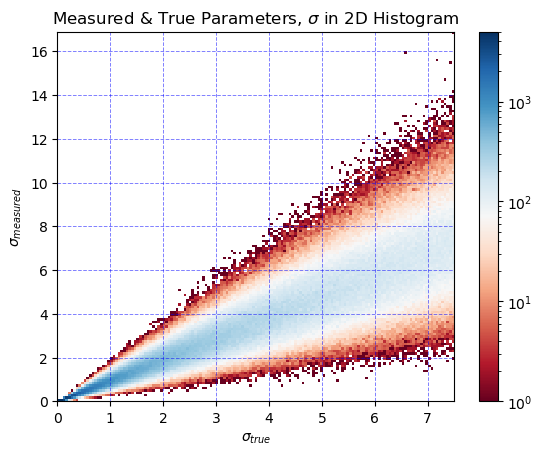

In [66]:
### Measured & True Parameters, $\sigma$ in 2D Histogram ###  
fig1, ax = plt.subplots()      
hist_sigma = plt.hist2d(sigma_true, sigma_best, bins = 151, norm = LogNorm(), cmap = 'RdBu')   
plt.xlabel(r"$\sigma_{true}$")
plt.ylabel(r"$\sigma_{measured}$")
plt.title(r"Measured & True Parameters, $\sigma$ in 2D Histogram")
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.colorbar(hist_sigma[3], ax = ax)
plt.savefig('2D_Histogram_Sigma.pdf')
plt.show()

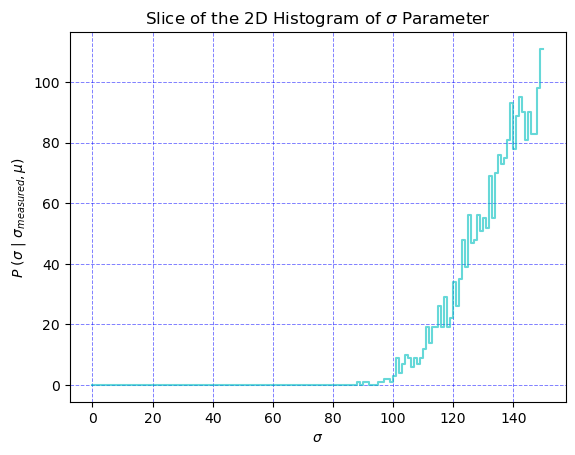

In [67]:
### Slice of the 2D Histogram of $\sigma$ Parameter ###
plt.plot(hist_sigma[0][:, 75], drawstyle = 'steps', color = 'c', alpha = 0.6)
plt.xlabel(r'$\sigma$')
plt.ylabel(r"$P ~ (\sigma ~ | ~ \sigma_{measured}, \mu)$")
plt.title(r'Slice of the 2D Histogram of $\sigma$ Parameter')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.savefig('Slice_Sigma.pdf')
plt.show()

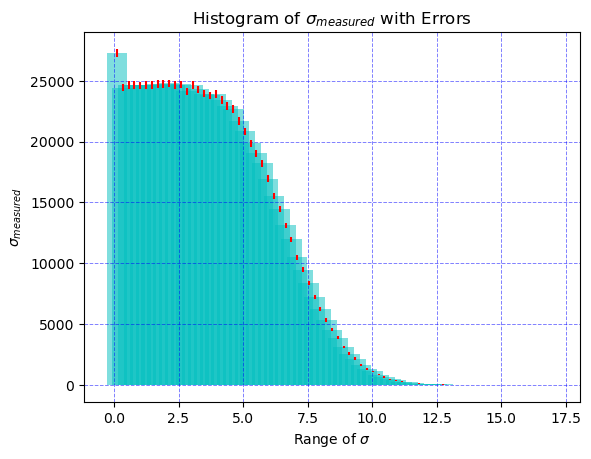

In [62]:
### Histogram of $\sigma_{measured}$ with Errors ###
data = np.array(sigma_best)
y, binEdges = np.histogram(data, bins = 75)
bincenters = 0.5*(binEdges[1:] + binEdges[:-1])
menStd = 2*np.sqrt(y)
plt.bar(bincenters, y, linewidth = 1, color = 'c', alpha = 0.5, yerr = menStd, ecolor = 'r')
plt.xlabel(r'Range of $\sigma$')
plt.ylabel(r"$\sigma_{measured}$")
plt.title(r'Histogram of $\sigma_{measured}$ with Errors')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.savefig('Measured_Sigma_Error.pdf')
plt.show()

C:\Users\a828a124\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


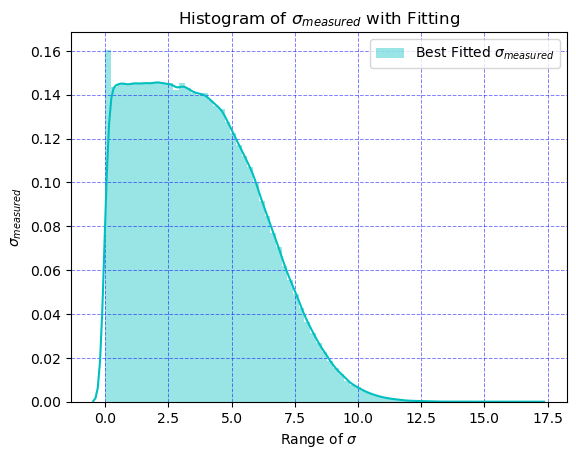

In [54]:
### Histogram of $\sigma_{measured}$ with Fitting ###
sns.distplot(data, bins = 75, color = 'c', label = r'Best Fitted $\sigma_{measured}$')
plt.xlabel(r'Range of $\sigma$')
plt.ylabel(r"$\sigma_{measured}$") 
plt.title(r'Histogram of $\sigma_{measured}$ with Fitting')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed', linewidth = 0.7)
plt.savefig('Measured_Sigma_Fit.pdf')
plt.legend()
plt.show()

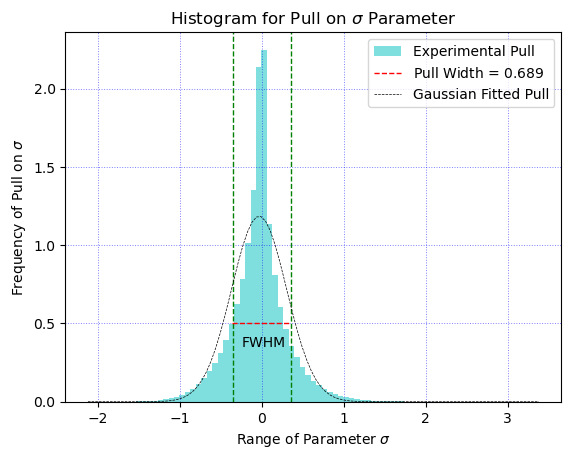

In [53]:
### Histogram for pull on $\sigma$ Parameter: Gaussian-Fit ###
pull_sigma = (np.asarray(sigma_best) - np.asarray(sigma_true))/sigma
plt.hist(pull_sigma, 75, color = 'c', alpha = 0.5, density = True, label = 'Experimental Pull')
plt.axvline(-0.35, linestyle = 'dashed', color='green', linewidth = 1)
plt.axvline(0.35, linestyle = 'dashed', color='green', linewidth = 1)
plt.plot((-0.364, 0.325 ), (0.5, 0.5), 'r--', linewidth = 1, label = r'Pull Width = '+'${:.3f}$'.format(0.325 + 0.364))
plt.text(-0.25, .35, 'FWHM')
mu1, sigma1 = norm.fit(pull_sigma)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu1, sigma1)
plt.plot(x, p, 'k--', linewidth = 0.5, label = 'Gaussian Fitted Pull')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dotted', linewidth = 0.7)
plt.xlabel(r'Range of Parameter $\sigma$')
plt.ylabel(r"Frequency of Pull on $\sigma$")
plt.title(r'Histogram for Pull on $\sigma$ Parameter')
plt.legend()
plt.savefig('Pull_Sigma.pdf')
plt.show()

